In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import zipfile
import os
import matplotlib.pyplot as plt

2024-05-23 19:15:30.558139: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Define paths to the dataset. train to train the CNN and test
train_dir = "/Users/manalalnamani/Desktop/FaceClassification/train"
test_dir = "/Users/manalalnamani/Desktop/FaceClassification/test"  

In [3]:
#The nuymber of images in each path (train and test for happy & sad images)
print(len(os.listdir('/Users/manalalnamani/Desktop/FaceClassification/train/happy')))
print(len(os.listdir('/Users/manalalnamani/Desktop/FaceClassification/train/sad')))
print(len(os.listdir('/Users/manalalnamani/Desktop/FaceClassification/test/happy')))
print(len(os.listdir('/Users/manalalnamani/Desktop/FaceClassification/test/sad')))

82
66
10
8


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #used for processing images during
# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255, #makesthe pixel values of the images to a range between 0 and 1
)
# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),   # re-sizing the images
    batch_size=32,           # 32 image batch during training the model
    class_mode='binary',     #'binary' for binary classification (happy vs. sad)
    subset='training'        #Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,       #makesthe pixel values of the images to a range between 0 and 1
 # Note: Using the same validation split as in the training set
)
# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),  # Resize images to 256x256 pixels
    batch_size=32,           # Use a batch size of 32 images
    class_mode='binary'      # Specify binary classification (happy vs. sad)
)


Found 145 images belonging to 2 classes.
Found 17 images belonging to 2 classes.


In [14]:

#Start Sequential model:
resnet_model = Sequential()    #ResNet50 is a pre-trained model

#calling the res-net50 model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3), #shape of input images
                                                pooling = 'max', classes = 2, #binary classification
                                              weights = 'imagenet')
#looping throigh the layers of Res-Net50
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights;

#adding the model layer (only one layer)
resnet_model.add(pretrained_model)
# make it one-dimensional
resnet_model.add(Flatten())
#creating the fully connected layer
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dropout(0.15))
#output layer
resnet_model.add(Dense(1, activation = 'sigmoid'))

In [15]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = resnet_model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5


2024-05-23 19:29:01.697693: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - ETA: 0s - loss: 6.0901 - accuracy: 0.4828

2024-05-23 19:29:29.997190: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - 33s 6s/step - loss: 6.0901 - accuracy: 0.4828 - val_loss: 3.4104 - val_accuracy: 0.4706
Epoch 2/5
5/5 [==============================] - 29s 7s/step - loss: 3.2639 - accuracy: 0.5310 - val_loss: 1.2791 - val_accuracy: 0.5882
Epoch 3/5
5/5 [==============================] - 45s 10s/step - loss: 1.6587 - accuracy: 0.5862 - val_loss: 1.2218 - val_accuracy: 0.4706
Epoch 4/5
5/5 [==============================] - 49s 10s/step - loss: 1.0541 - accuracy: 0.5931 - val_loss: 0.9117 - val_accuracy: 0.5882
Epoch 5/5
5/5 [==============================] - 47s 9s/step - loss: 1.1419 - accuracy: 0.5517 - val_loss: 1.2718 - val_accuracy: 0.4706


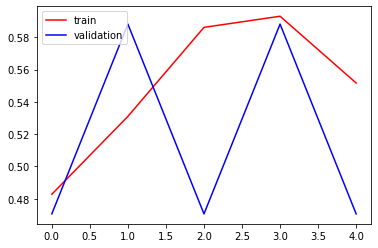

In [17]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

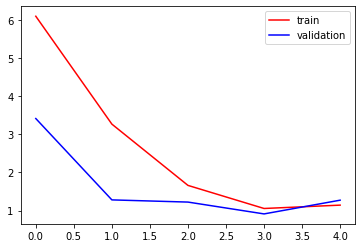

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 17 images belonging to 2 classes.


In [20]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

2024-05-23 19:33:25.157436: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 8s 8s/step
[[0.94230264]
 [0.83928037]
 [0.92429686]
 [0.7075054 ]
 [0.8103759 ]
 [0.8974187 ]
 [0.13363762]
 [0.9521903 ]
 [0.8892148 ]
 [0.9344353 ]
 [0.75881606]
 [0.7980399 ]
 [0.78918785]
 [0.8412022 ]
 [0.9496423 ]
 [0.91130453]
 [0.93751323]]


In [21]:
len(predictions)

17

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[1 9]
 [0 7]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.10      0.18        10
           1       0.44      1.00      0.61         7

    accuracy                           0.47        17
   macro avg       0.72      0.55      0.40        17
weighted avg       0.77      0.47      0.36        17

